In [313]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.preprocessing import image
import numpy as np
from keras import backend as K

In [314]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

In [315]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [316]:
train_generator = train_datagen.flow_from_directory('training_set',target_size=(64, 64),
                                                   batch_size=32,class_mode='binary')



Found 608 images belonging to 2 classes.


In [317]:
validation_generator = test_datagen.flow_from_directory('test_set',target_size=(64,64),
                                                   batch_size=32,class_mode='binary')

Found 138 images belonging to 2 classes.


In [318]:
from tensorflow.keras.applications import DenseNet169



In [319]:
base_model = DenseNet169(input_shape = (64, 64, 3), # Shape of our images
include_top = False, # Leave out the last fully connected layer
weights = 'imagenet')

In [320]:
for layer in base_model.layers:
    layer.trainable = False

In [321]:
from tensorflow.keras import layers 
from tensorflow.keras import Model 
import matplotlib.pyplot as plt
# Flatten the output layer to 1 dimension
x = layers.Flatten()(base_model.output)

# Add a fully connected layer with 512 hidden units and ReLU activation
x = layers.Dense(256, activation='relu')(x)

# Add a dropout rate of 0.5
x = layers.Dropout(0.5)(x)

# Add a final sigmoid layer for classification
x = layers.Dense(1, activation='sigmoid')(x)

model = tf.keras.models.Model(base_model.input, x)

model.compile(optimizer = tf.keras.optimizers.RMSprop(lr=0.001), loss = 'binary_crossentropy',metrics = ['acc'])


In [322]:
model.fit(train_generator, validation_data = validation_generator, epochs =30)

Epoch 1/30
19/19 [==============================] - 31s 839ms/step - loss: 6.0930 - acc: 0.4839 - val_loss: 0.8688 - val_acc: 0.5507
Epoch 2/30
19/19 [==============================] - 11s 592ms/step - loss: 1.1131 - acc: 0.5726 - val_loss: 0.5669 - val_acc: 0.7319
Epoch 3/30
19/19 [==============================] - 11s 591ms/step - loss: 0.8226 - acc: 0.5684 - val_loss: 0.5463 - val_acc: 0.7174
Epoch 4/30
19/19 [==============================] - 11s 586ms/step - loss: 0.6628 - acc: 0.6366 - val_loss: 0.5017 - val_acc: 0.7899
Epoch 5/30
19/19 [==============================] - 11s 593ms/step - loss: 0.6325 - acc: 0.6484 - val_loss: 0.6398 - val_acc: 0.6087
Epoch 6/30
19/19 [==============================] - 11s 594ms/step - loss: 0.6025 - acc: 0.6719 - val_loss: 0.5105 - val_acc: 0.7536
Epoch 7/30
19/19 [==============================] - 12s 645ms/step - loss: 0.6678 - acc: 0.6568 - val_loss: 0.5425 - val_acc: 0.6957
Epoch 8/30
19/19 [==============================] - 11s 586ms/step - 

<AxesSubplot:>

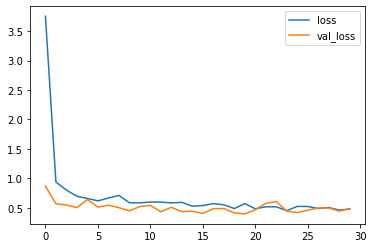

In [323]:
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd

losses = pd.DataFrame(model.history.history)
losses[['loss','val_loss']].plot()

In [324]:
from sklearn.metrics import classification_report,confusion_matrix

from tensorflow.keras.preprocessing import image

pred_probabilities =model.predict_generator(validation_generator)

pred_probabilities

C:\Users\Dell\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1905: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


array([[5.7236981e-01],
       [3.7700993e-01],
       [6.5012395e-01],
       [4.4721457e-01],
       [9.9688363e-01],
       [9.8590028e-01],
       [9.9442971e-01],
       [9.9627030e-01],
       [9.8613107e-01],
       [7.0660508e-01],
       [6.7765176e-02],
       [9.9991286e-01],
       [9.9956954e-01],
       [9.9966228e-01],
       [9.9921703e-01],
       [9.9997747e-01],
       [4.3013692e-04],
       [9.2290580e-01],
       [6.4284587e-01],
       [9.9745142e-01],
       [5.6739438e-01],
       [7.8369212e-01],
       [4.6080461e-01],
       [6.8910623e-01],
       [6.7130691e-01],
       [8.8278103e-01],
       [8.1712615e-01],
       [5.4897755e-01],
       [3.2296330e-01],
       [3.4571391e-01],
       [8.2541633e-01],
       [1.1500424e-01],
       [6.8323398e-01],
       [9.9960434e-01],
       [8.4259868e-01],
       [3.4974265e-01],
       [9.8682988e-01],
       [3.9377213e-02],
       [9.9997550e-01],
       [3.6628115e-01],
       [3.6187869e-01],
       [8.568308

In [325]:
validation_generator.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1])

In [326]:
predictions = pred_probabilities > 0.5
predictions

array([[ True],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [

In [327]:
print(classification_report(validation_generator.classes,predictions))
confusion_matrix(validation_generator.classes,predictions)

              precision    recall  f1-score   support

           0       0.45      0.33      0.38        60
           1       0.57      0.69      0.63        78

    accuracy                           0.54       138
   macro avg       0.51      0.51      0.51       138
weighted avg       0.52      0.54      0.52       138



array([[20, 40],
       [24, 54]], dtype=int64)

Note: There are less samples to train ans to test. I randomly create train and validation set. The validation accuracy is 78% which i tried with various models and densenet gave the best result.This is the best i could have donr with that amount of sample. The performance report is also not good because of less samples.

              precision    recall  f1-score   support

           0       0.45      0.33      0.38        60
           1       0.57      0.69      0.63        78

    accuracy                           0.54       138
   macro avg       0.51      0.51      0.51       138
weighted avg       0.52      0.54      0.52       138



there are less samples of 0(covid) compared to class 1(non covide) thats why the report is better for class 1 compared to class 0